In [2]:
import numpy as np
import seaborn as sns

import os
marius_path = "/Users/mariusmahiout/Documents/repos/INSTK5100_IRL_proj/src"
herman_path = ""
os.chdir(marius_path)

from mdp import Mdp
import dynamic_programming as dp
import linear_programming as lp

In [3]:
# setting params
step_rwd = 0
targ_rwd = 1
noise = .3
gamma = .9
rewards = [step_rwd, targ_rwd]
size = 5
n_states = size ** 2
n_actions = 4
theta = 10e-6

# making env
env = Mdp(targ_rwd=targ_rwd, step_rwd=step_rwd, noise=noise)
p = env.get_p()

# inferring policy and value func
V, pi = dp.value_iteration(theta, gamma, rewards, p, n_actions, n_states)
dp.print_policy(pi=pi)

+---+---+---+---+---+
| → | → | → | → | → |
+---+---+---+---+---+
| → | → | → | → | ↑ |
+---+---+---+---+---+
| → | → | → | ↑ | ↑ |
+---+---+---+---+---+
| ↑ | → | ↑ | ↑ | ↑ |
+---+---+---+---+---+
| → | → | ↑ | ↑ | ↑ |
+---+---+---+---+---+


In [6]:
import matplotlib.pyplot as plt

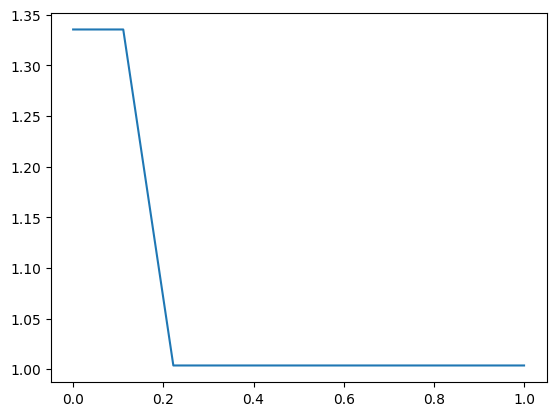

In [13]:
# constructing true reward function
size = int(np.sqrt(n_states))
r_true = np.zeros(n_states)
r_true[4] = 1
r_true = np.reshape(r_true, (size, size))

# success measure RMS
def calc_rms(a, b):
    diffs = a - b
    diffs_sq = (a-b)**2
    sum_diffs_sq = sum(diffs_sq.flatten())
    rms = np.sqrt(sum_diffs_sq)
    return rms

# getting reward estimates
num_samples = 10
lambdas = np.linspace(0, 1, num_samples)
#r_est_list = []
rms_list = []
for l in lambdas:
    r_est = lp.infer_reward(
        transition_probs=p,
        policy=pi,
        gamma=gamma,
        _lambda=l,
    )
    rms = calc_rms(r_true, r_est)
    rms_list.append(rms)

# calculating rms


# plotting rms vs lambda

plt.plot(lambdas, rms_list)
